<a href="https://www.kaggle.com/code/ocanaydin/car-price-pred?scriptVersionId=122375877" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/car-price-dataset/car_price.csv


# Data Preprocessing

**Get Data**

In [2]:
df = pd.read_csv("/kaggle/input/car-price-dataset/car_price.csv")

In [3]:
df.head(5)

,CarName,carbody,drivewheel,enginelocation,fueltype,aspiration,doornumber,cylindernumber,enginetype,fuelsystem,...,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,alfa-romero giulia,convertible,rwd,front,gas,std,two,four,dohc,mpfi,...,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,alfa-romero stelvio,convertible,rwd,front,gas,std,two,four,dohc,mpfi,...,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,alfa-romero Quadrifoglio,hatchback,rwd,front,gas,std,two,six,ohcv,mpfi,...,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,audi 100 ls,sedan,fwd,front,gas,std,four,four,ohc,mpfi,...,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,audi 100ls,sedan,4wd,front,gas,std,four,five,ohc,mpfi,...,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0


**Check for nan values.If they are,drop them.**

In [4]:
print(df.isnull().values.any())
#There is no nan values so we don't need to drop them.

False


**Find Categorical and Numerical columns.**

In [5]:
categorical_columns = df.select_dtypes(include = 'object').columns
numerical_columns = df.select_dtypes(include = 'number').columns
print(f"Categorical columns : \n{categorical_columns}\n Numerical columns : \n{numerical_columns}\n")

Categorical columns : 
Index(['CarName', 'carbody', 'drivewheel', 'enginelocation', 'fueltype',
       'aspiration', 'doornumber', 'cylindernumber', 'enginetype',
       'fuelsystem'],
      dtype='object')
 Numerical columns : 
Index(['symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight',
       'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price'],
      dtype='object')



**Analysis on NUMERICAL Values**

In [6]:
#Use describe method to see some features as mean,std,min,max.
df[numerical_columns].describe()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000
mean,0.828571,98.947143,174.354286,65.935714,53.768571,2565.909524,127.266667,3.333905,3.258286,10.224381,104.000000,5110.476190,25.180952,30.695238,13289.665081
std,1.244757,6.172319,12.457557,2.141794,2.489242,522.279331,41.297095,0.270150,0.311277,4.068746,39.114725,484.530811,6.487059,6.835908,7918.471818
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.500000,166.800000,64.125000,52.000000,2174.250000,98.000000,3.150000,3.110000,8.525000,70.000000,4800.000000,19.000000,25.000000,7823.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2422.500000,120.000000,3.320000,3.290000,9.000000,95.000000,5100.000000,24.000000,30.000000,10470.000000
75%,2.000000,102.400000,183.500000,66.900000,55.575000,2953.500000,145.750000,3.587500,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16502.250000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


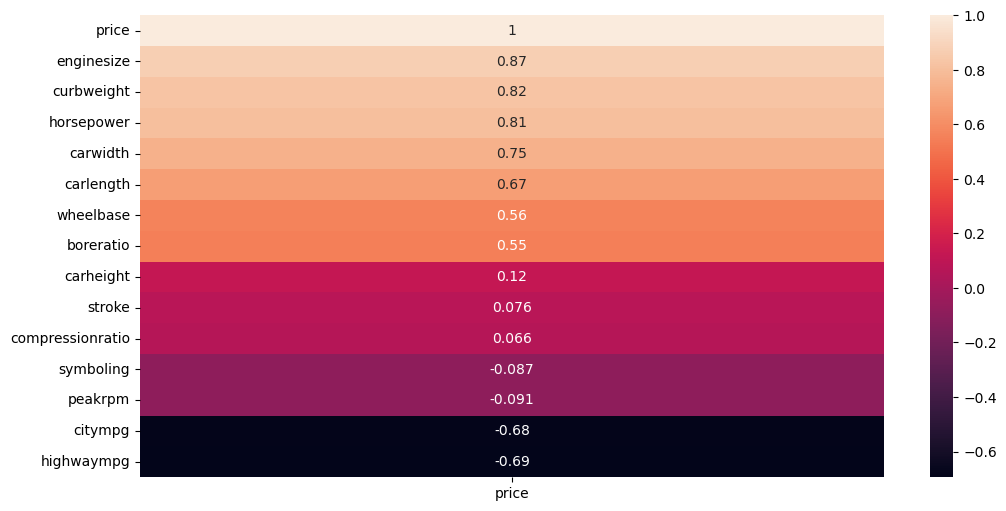

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
#Find Correlation Matrix and plot it.
plt.figure(figsize = (12,6))
corr_matrix = df.corr()
sns.heatmap(corr_matrix[["price"]].sort_values("price",ascending = False),annot = True)
plt.show()

In [8]:
#For feature extraction,we can try to remove low correlation columns to get more robust model.(We'll see.)
#We see that [stroke,compressionratio,symboling,peakrpm] are lower values and they can be removed.
df.drop(columns = ["stroke","compressionratio","symboling","peakrpm"],inplace = True)

In [9]:
#We need to seperate price column from dataset.Reason for this,we dont want to standardization our target variable.
y = df["price"]
df.drop(columns =["price"],inplace = True)

In [10]:
#Find numerical columns again cause we drop some columns which have lowest correlation values.
num_columns = df.select_dtypes(include = "number").columns
#Standardize data to get scaled numerical features.
from sklearn.preprocessing import StandardScaler
SS = StandardScaler()
scaled_num_columns = SS.fit_transform(df[num_columns])

In [11]:
scaled_num_columns = pd.DataFrame(scaled_num_columns,columns = num_columns)
scaled_num_columns.head(5)

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,horsepower,citympg,highwaympg
0,-1.680384,-0.446922,-0.859140,-2.000787,-0.034373,0.066345,0.504981,0.179388,-0.646047,-0.541855
1,-1.680384,-0.446922,-0.859140,-2.000787,-0.034373,0.066345,0.504981,0.179388,-0.646047,-0.541855
2,-0.722219,-0.253808,-0.203920,-0.551108,0.493423,0.600343,-2.426311,1.281345,-0.955089,-0.688490
3,0.138505,0.180700,0.123689,0.214000,-0.439337,-0.443380,-0.533958,-0.051254,-0.182482,-0.101947
4,0.073544,0.180700,0.217292,0.214000,0.495343,0.211981,-0.533958,0.281896,-1.109611,-1.275034


**Analysis on CATEGORICAL COLUMNS**

In [12]:
df[categorical_columns].head(5)

,CarName,carbody,drivewheel,enginelocation,fueltype,aspiration,doornumber,cylindernumber,enginetype,fuelsystem
0,alfa-romero giulia,convertible,rwd,front,gas,std,two,four,dohc,mpfi
1,alfa-romero stelvio,convertible,rwd,front,gas,std,two,four,dohc,mpfi
2,alfa-romero Quadrifoglio,hatchback,rwd,front,gas,std,two,six,ohcv,mpfi
3,audi 100 ls,sedan,fwd,front,gas,std,four,four,ohc,mpfi
4,audi 100ls,sedan,4wd,front,gas,std,four,five,ohc,mpfi


In [13]:
#Apply label encoding to categorical columns.
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
df_encoded_categorical = df[categorical_columns].apply(LE.fit_transform)

In [14]:
#Concatenate the scaled_num_columns,encoded_categorical and target variable(price).
df = pd.concat([df_encoded_categorical,scaled_num_columns,y],axis = 1)

In [15]:
df.head(5)

,CarName,carbody,drivewheel,enginelocation,fueltype,aspiration,doornumber,cylindernumber,enginetype,fuelsystem,...,carlength,carwidth,carheight,curbweight,enginesize,boreratio,horsepower,citympg,highwaympg,price
0,2,0,2,0,1,0,1,2,0,5,...,-0.446922,-0.859140,-2.000787,-0.034373,0.066345,0.504981,0.179388,-0.646047,-0.541855,13495.0
1,3,0,2,0,1,0,1,2,0,5,...,-0.446922,-0.859140,-2.000787,-0.034373,0.066345,0.504981,0.179388,-0.646047,-0.541855,16500.0
2,1,2,2,0,1,0,1,3,5,5,...,-0.253808,-0.203920,-0.551108,0.493423,0.600343,-2.426311,1.281345,-0.955089,-0.688490,16500.0
3,4,3,1,0,1,0,0,2,3,5,...,0.180700,0.123689,0.214000,-0.439337,-0.443380,-0.533958,-0.051254,-0.182482,-0.101947,13950.0
4,5,3,0,0,1,0,0,1,3,5,...,0.180700,0.217292,0.214000,0.495343,0.211981,-0.533958,0.281896,-1.109611,-1.275034,17450.0


In [16]:
#Split dataset as train and test.
X = df.iloc[:,:-1]
Y = df.iloc[:,-1:]
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.33,random_state = 42)

# TRAIN ALGORITHM with PROCESSED DATA

In [17]:
#I will use xgboost for regression.You can use different algorithms if you want.
from xgboost import XGBRegressor
xgb = XGBRegressor()
#Fit model with train datas.
xgb.fit(X_train,Y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

# PREDICTION

In [18]:
#Get predictions using test data.
preds = xgb.predict(X_test)

In [19]:
#You can see the real prices and preds in same table as shown below:
preds = pd.DataFrame(preds,index=Y_test.index,columns = ["preds"])
results = pd.concat([Y_test,preds],axis = 1)

In [20]:
results

,price,preds
30,6479.0,5409.247559
172,17669.0,13618.269531
84,14489.0,14372.870117
199,18950.0,17252.363281
60,8495.0,10633.474609
...,...,...
205,21105.0,21108.882812
208,12440.0,16238.781250
31,6855.0,7353.241699
12,20970.0,19143.113281


In [21]:
#Create new column which shows that differences of each car real price and its predicted price
results["difference"] = results["price"] - results["preds"]

In [22]:
results

,price,preds,difference
30,6479.0,5409.247559,1069.752441
172,17669.0,13618.269531,4050.730469
84,14489.0,14372.870117,116.129883
199,18950.0,17252.363281,1697.636719
60,8495.0,10633.474609,-2138.474609
...,...,...,...
205,21105.0,21108.882812,-3.882812
208,12440.0,16238.781250,-3798.781250
31,6855.0,7353.241699,-498.241699
12,20970.0,19143.113281,1826.886719


In [23]:
#Use mean squared error metric to see performance of model.
from sklearn.metrics import mean_squared_error
mse_error = mean_squared_error(Y_test,preds)
print(f"Mse error : {mse_error}")
#See the means and differences between them.
print(f"Price mean : {results['price'].mean()}\nPreds mean : {results['preds'].mean()}\n")
print(f"Difference between means : {abs(results['price'].mean() - results['preds'].mean())}")

Mse error : 6649125.517618045
Price mean : 14145.852385714286
Preds mean : 14531.8056640625

Difference between means : 385.95327834821364
